In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import (StandardScaler,
                                  MinMaxScaler,
                                  Imputer,
                                  LabelEncoder,
                                  OneHotEncoder)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set_context("notebook")
plt.style.use("fivethirtyeight")

In [18]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                          'ml/machine-learning-databases/'
                          'wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol',
                   'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

label_map = {1: 0, 2: 1, 3: 2}
df_wine["Class label"] = df_wine["Class label"].map(label_map)
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
# Convert wine dataframe into numpy objects: X, y
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values
X.shape, y.shape

((178, 13), (178,))

In [20]:
np.unique(y), np.bincount(y)

(array([0, 1, 2]), array([59, 71, 48]))

In [21]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((124, 13), (124,), (54, 13), (54,))

In [22]:
np.bincount(y_train), np.bincount(y_test)

(array([41, 50, 33]), array([18, 21, 15]))

In [24]:
# Standarize the data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [27]:
# Compute cov matrix and its eigen values and eigen vectors
cov_matrix = np.cov(X_train_std.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values

array([ 4.7095539 ,  2.63606471,  1.55728758,  0.93422662,  0.85129454,
        0.5709688 ,  0.46462025,  0.37764772,  0.10409155,  0.14951983,
        0.21165109,  0.2630501 ,  0.27571434])

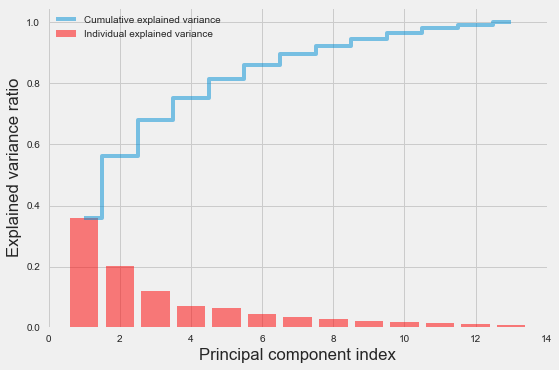

In [39]:
tot_var = np.sum(eigen_values)
var_exp = [(e / tot_var) for e in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, align="center", alpha=0.5, color='red', label="Individual explained variance")
plt.step(range(1, 14), cum_var_exp, where="mid", alpha=0.5, label="Cumulative explained variance")
plt.legend(loc="best")
plt.xlabel("Principal component index")
plt.ylabel("Explained variance ratio");

In [41]:
# Sort eigen vectors and eigen values
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i])
               for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs[0]

(4.7095539016602999,
 array([-0.14119433,  0.24946815, -0.05104853,  0.19890851, -0.1444494 ,
        -0.40472564, -0.42654202,  0.29573373, -0.32620144,  0.07420694,
        -0.29277478, -0.37482201, -0.2889145 ]))

In [42]:
cum_var_exp

array([ 0.35935182,  0.56049075,  0.67931604,  0.75060008,  0.81555618,
        0.85912266,  0.89457445,  0.92339001,  0.94442776,  0.9644992 ,
        0.98064876,  0.99205753,  1.        ])

In [50]:
W = [eigen_pairs[i][1][:, np.newaxis] for i in range(len(eigen_values))]
count = 0
for e in W:
    if count == 0:
        W_new = e
        
    else:
        W_new = np.hstack((W_new, e))
    
    count +=1
W_new.shape

(13, 13)

In [61]:
# Using scikit-learn pca
pca = PCA(n_components=2)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std, )
X_test_pca = pca.transform(X_test_std)
np.cumsum(pca.explained_variance_ratio_)

array([ 0.35935182,  0.56049075])

In [62]:
# Using scikit-learn LDA
lda = LDA(n_components=2)
lda.fit(X_train_std, y_train)
X_train_lda = lda.transform(X_train_std)
X_test_lda = lda.transform(X_test_std)
lda.explained_variance_ratio_

array([ 0.68259828,  0.31740172])

In [64]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
print("The accuracy score is: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

The accuracy score is: 98.15%


In [65]:
lr = LogisticRegression()
lr.fit(X_train_lda, y_train)
y_pred = lr.predict(X_test_lda)
print("The accuracy score is: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

The accuracy score is: 96.30%


In [68]:
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']

In [78]:
params, weights = [], []

for c in np.linspace(-4, 4, 100):
    lr = LogisticRegression(C=10**c)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10 ** c)

weights = np.array(weights)

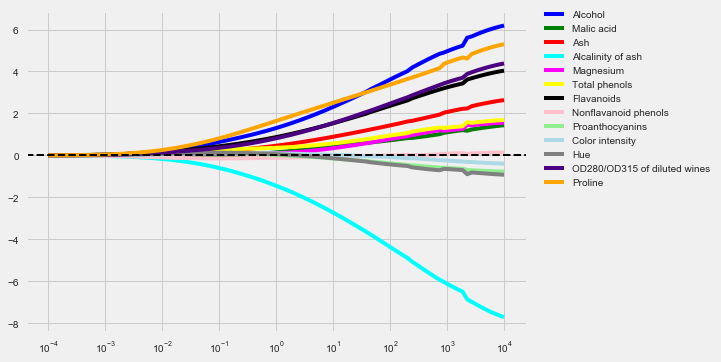

In [97]:
for i in range(13):
    plt.plot(params, weights[:, i], color=colors[i], label=df_wine.columns[i + 1])
plt.legend(loc="upper center", fancybox=True, ncol=1, bbox_to_anchor=(1.2, 1.03))
plt.xscale("log")
plt.axhline(0, color="black", linestyle="--", linewidth=2)